In [1]:
import matplotlib.pyplot as plt
import numpy as np

from BNNLayer import BNNLayer
from BNN import BNN

import torch
from torch.autograd import Variable

In [2]:
x = np.random.uniform(-4, 4, size=1).reshape((-1, 1))
noise = np.random.normal(0, 9, size=1).reshape((-1, 1))

def true_func(x):
    return -x**2 +2 

y = true_func(x) + 0.1*noise

In [3]:
Var = lambda x, dtype=torch.FloatTensor: Variable(torch.from_numpy(x).type(dtype))
X = Var(x)
Y = Var(y)

n = 1

In [4]:
bnn = BNN(BNNLayer(1, 100, activation='relu', prior_mean=0, prior_rho=0),
          BNNLayer(100, 1, activation='none', prior_mean=0, prior_rho=0))

optim = torch.optim.Adam(bnn.parameters(), lr=1e-1)

In [5]:
for i_ep in range(1000):
    kl, lg_lklh = bnn.Forward(X, Y, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()

In [6]:
x_ = np.linspace(-5, 5)
y_ = -x_ ** 2 + 2
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

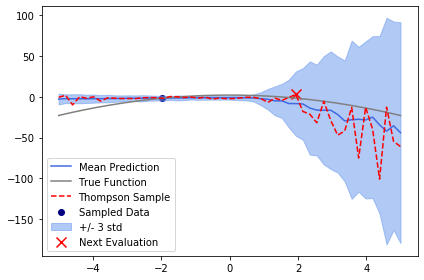

In [7]:
plt.scatter(x, y, c='navy', label='Sampled Data')
plt.plot(x_, pred_mean, c='royalblue', label='Mean Prediction')
plt.fill_between(x_, pred_mean - 3 * pred_std, pred_mean + 3 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='True Function')

new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

plt.plot(x_, pred_lst[0],linestyle='--',c='red',label='Thompson Sample')

plt.scatter(x_[new],pred_lst[0][new],marker='x',c='red',label='Next Evaluation',s=100)


plt.legend()
plt.tight_layout()
plt.savefig(f'bayes_opt_{n}.pdf')
plt.show()

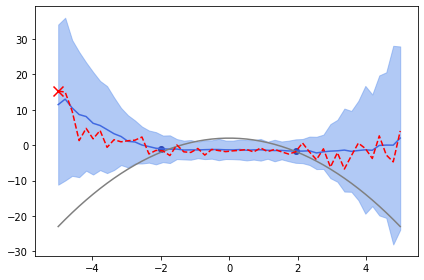

In [8]:
new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

noise = np.random.normal(0, 9, size=1).reshape((-1, 1))
y_new = np.append(y, true_func(x_[new])+ 0.1*noise)

n += 1
X = Var(x_new.reshape(n,1))
Y = Var(y_new.reshape(n,1))

x = x_new
y = y_new


for i_ep in range(1000):
    kl, lg_lklh = bnn.Forward(X, Y, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
x_ = np.linspace(-5, 5)
y_ = -x_ ** 2 + 2
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

plt.scatter(x, y, c='navy', label='Sampled Data')
plt.plot(x_, pred_mean, c='royalblue', label='Mean Prediction')
plt.fill_between(x_, pred_mean - 3 * pred_std, pred_mean + 3 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='True Function')

new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

plt.plot(x_, pred_lst[0],linestyle='--',c='red',label='Thompson Sample')

plt.scatter(x_[new],pred_lst[0][new],marker='x',c='red',label='Next Evaluation',s=100)


#plt.legend()
plt.tight_layout()
plt.savefig(f'bayes_opt_{n}.pdf')
plt.show()

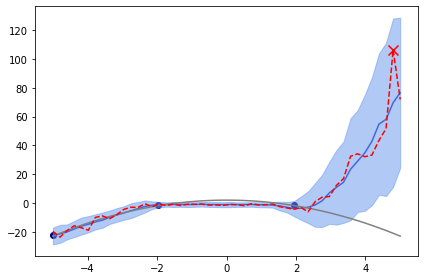

In [9]:
new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

noise = np.random.normal(0, 9, size=1).reshape((-1, 1))
y_new = np.append(y, true_func(x_[new])+ 0.1*noise)

n += 1
X = Var(x_new.reshape(n,1))
Y = Var(y_new.reshape(n,1))

x = x_new
y = y_new


for i_ep in range(1000):
    kl, lg_lklh = bnn.Forward(X, Y, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
x_ = np.linspace(-5, 5)
y_ = -x_ ** 2 + 2
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

plt.scatter(x, y, c='navy', label='Sampled Data')
plt.plot(x_, pred_mean, c='royalblue', label='Mean Prediction')
plt.fill_between(x_, pred_mean - 3 * pred_std, pred_mean + 3 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='True Function')

new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

plt.plot(x_, pred_lst[0],linestyle='--',c='red',label='Thompson Sample')

plt.scatter(x_[new],pred_lst[0][new],marker='x',c='red',label='Next Evaluation',s=100)


#plt.legend()
plt.tight_layout()
plt.savefig(f'bayes_opt_{n}.pdf')
plt.show()

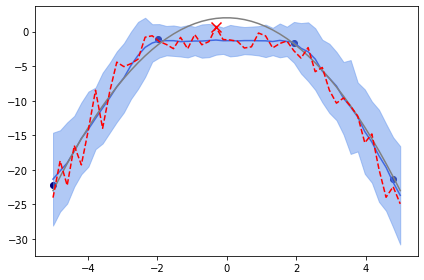

In [10]:
new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

noise = np.random.normal(0, 9, size=1).reshape((-1, 1))
y_new = np.append(y, true_func(x_[new])+ 0.1*noise)

n += 1
X = Var(x_new.reshape(n,1))
Y = Var(y_new.reshape(n,1))

x = x_new
y = y_new


for i_ep in range(1000):
    kl, lg_lklh = bnn.Forward(X, Y, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
x_ = np.linspace(-5, 5)
y_ = -x_ ** 2 + 2
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

plt.scatter(x, y, c='navy', label='Sampled Data')
plt.plot(x_, pred_mean, c='royalblue', label='Mean Prediction')
plt.fill_between(x_, pred_mean - 3 * pred_std, pred_mean + 3 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='True Function')

new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

plt.plot(x_, pred_lst[0],linestyle='--',c='red',label='Thompson Sample')

plt.scatter(x_[new],pred_lst[0][new],marker='x',c='red',label='Next Evaluation',s=100)


#plt.legend()
plt.tight_layout()
plt.savefig(f'bayes_opt_{n}.pdf')
plt.show()

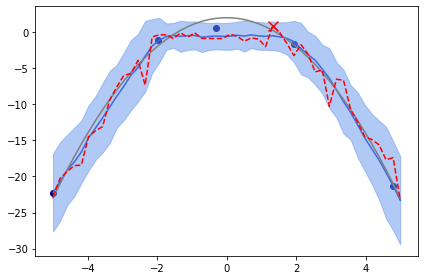

In [11]:
new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

noise = np.random.normal(0, 9, size=1).reshape((-1, 1))
y_new = np.append(y, true_func(x_[new])+ 0.1*noise)

n += 1
X = Var(x_new.reshape(n,1))
Y = Var(y_new.reshape(n,1))

x = x_new
y = y_new


for i_ep in range(1000):
    kl, lg_lklh = bnn.Forward(X, Y, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
x_ = np.linspace(-5, 5)
y_ = -x_ ** 2 + 2
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

plt.scatter(x, y, c='navy', label='Sampled Data')
plt.plot(x_, pred_mean, c='royalblue', label='Mean Prediction')
plt.fill_between(x_, pred_mean - 3 * pred_std, pred_mean + 3 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='True Function')

new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

plt.plot(x_, pred_lst[0],linestyle='--',c='red',label='Thompson Sample')

plt.scatter(x_[new],pred_lst[0][new],marker='x',c='red',label='Next Evaluation',s=100)


#plt.legend()
plt.tight_layout()
plt.savefig(f'bayes_opt_{n}.pdf')
plt.show()

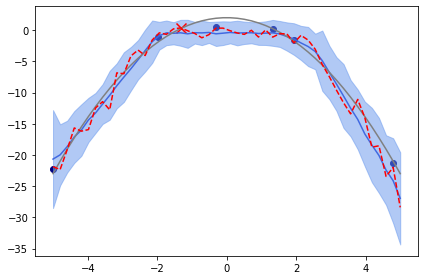

In [12]:
new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

noise = np.random.normal(0, 9, size=1).reshape((-1, 1))
y_new = np.append(y, true_func(x_[new])+ 0.1*noise)

n += 1
X = Var(x_new.reshape(n,1))
Y = Var(y_new.reshape(n,1))

x = x_new
y = y_new


for i_ep in range(1000):
    kl, lg_lklh = bnn.Forward(X, Y, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
x_ = np.linspace(-5, 5)
y_ = -x_ ** 2 + 2
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

plt.scatter(x, y, c='navy', label='Sampled Data')
plt.plot(x_, pred_mean, c='royalblue', label='Mean Prediction')
plt.fill_between(x_, pred_mean - 3 * pred_std, pred_mean + 3 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='True Function')

new = np.argmax(pred_lst[0])
x_new = np.append(x,x_[new])

plt.plot(x_, pred_lst[0],linestyle='--',c='red',label='Thompson Sample')

plt.scatter(x_[new],pred_lst[0][new],marker='x',c='red',label='Next Evaluation',s=100)


#plt.legend()
plt.tight_layout()
plt.savefig(f'bayes_opt_{n}.pdf')
plt.show()

In [18]:
x

array([-0.90880563,  1.93877551, -3.16326531, -0.10204082, -0.51020408,
       -0.51020408,  0.71428571, -4.18367347,  0.10204082])

In [135]:
x_[5]

-3.979591836734694

In [153]:
x2 = np.append(x,4)

In [154]:
noise = np.random.normal(0, 9, size=1).reshape((-1, 1))
y2 = np.append(y, (-12 + 0.1*noise))

In [183]:
X2 = Var(x2.reshape(2,1))
Y2 = Var(y2.reshape(2,1))

In [181]:
x2.reshape(2,1)

array([[-3.06603365],
       [ 4.        ]])

In [184]:
X2

tensor([[-3.0660],
        [ 4.0000]])

In [185]:
for i_ep in range(400):
    kl, lg_lklh = bnn.Forward(X2, Y2, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()

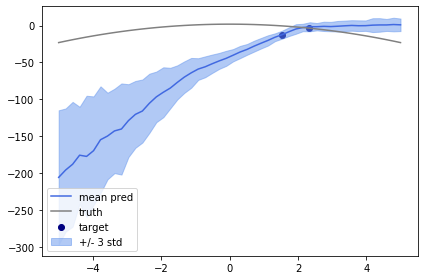

In [10]:
x_ = np.linspace(-5, 5)
y_ = -x_ ** 2 + 2
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

plt.scatter(x_new, y_new, c='navy', label='target')
plt.plot(x_, pred_mean, c='royalblue', label='mean pred')
plt.fill_between(x_, pred_mean - 3 * pred_std, pred_mean + 3 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='truth')

plt.legend()
plt.tight_layout()
plt.show()